# Finding The Best Markets To Advertise In
In this project we assume that we're working for an e-learning company that covers the domain of many sectors such as game development and data science, operating on both the web and mobile devices. We'd like to promote our product(s) by advertisement as cheaply as possible with a successful campaign.  
We'll work with an open source dataset of freeCodeCamp's 2017 survey which contain approximately 20,000 developers. This dataset can be found here: https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
survey = pd.read_csv('datasets/2017-fCC-New-Coders-Survey-Data.csv')
print(survey.shape)
survey.head()

(18175, 136)


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset provides us with information on how people are learning to code online. It asks questions such as preference to what businesses they'd like to work for, career interests, how much money they expect to earn each year etc.  
We'll start this analysis by first focusing on answering questions about the population of new coders, such as:  
* Location of coders
* The location of coders with the greatest population
* How much money people are willing to spend to learn code 
  
# Checking for Sample Representivity  
Before we start analysis let's check if the sample we have will be representative to the entire population, in particular of our population of interest. 

In [2]:
survey['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                                                       823
  Front-End Web Developer                                                                                                                                                      450
  Data Scientist                                                                                                                                                               152
Back-End Web Developer                                                                                                                                                         142
  Mobile Developer                                                                                                                                                             117
Game Developer                                                                                           

Many people seem to have more than one interest, sometimes exceeding 8 different Job Interests. Our focus is mobile and web development so we will figure out how many people wish to work in either of these domains. By observation, a lot of people wish to pursue a Web Development job, but not as many wish to persue Mobile Development.  
It would be interesting to see what percentage of people are unsure about what job they wish to persue, i.e. more than 3 jobs listed and to visualise the number of people choosing a job involving Web or Mobile development over other jobs.

In [3]:
interest_no_nulls = survey['JobRoleInterest'].dropna()
interest_no_nulls = interest_no_nulls.str.split(',')
number_of_ints = interest_no_nulls.apply(lambda x: len(x))
number_of_ints.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


(0, 100)

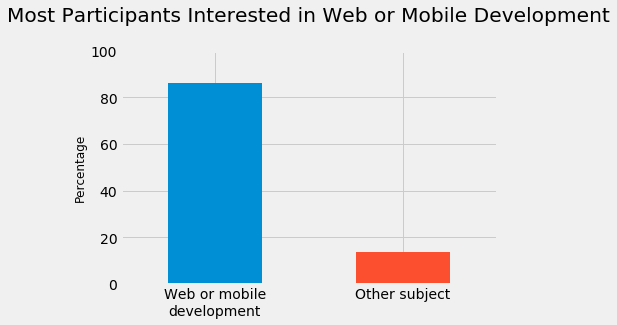

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

web_mob = survey['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')
freq = web_mob.value_counts(normalize=True) * 100
print(freq)

plt.style.use('fivethirtyeight')
freq.plot.bar()
plt.title('Most Participants Interested in Web or Mobile Development',y = 1.1)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])

Only 31.7% of people were certain on what job they wanted to pursue, whilst approximately 40% of people listed 5 or more jobs.  
Visualising web or mobile development vs other subjects we see a large preference towards the former, indicating that this is where to best focus on e-learning material. This large preference may be due to coders not knowing what areas that are out there that they could persue. Nevertheless we thus should advertise to people focusing on mostly web or mobile development.  
  
Now we've checked for sample representivity, we'll focus on the questions stated above to solve where to aim advertisement campaigns geographically.  
  
# Locations & Densities of New Coders

In [5]:
survey_no_nulls = survey[survey['JobRoleInterest'].notnull()].copy()
ab = survey_no_nulls['CountryLive'].value_counts()
rel = survey_no_nulls['CountryLive'].value_counts(normalize=True) * 100
pd.DataFrame(data = {'Percentages': rel, 'Absolute Frequency': ab})

,Percentages,Absolute Frequency
United States of America,45.700497,3125
India,7.721556,528
United Kingdom,4.606610,315
Canada,3.802281,260
Poland,1.915765,131
Brazil,1.886517,129
Germany,1.828020,125
Australia,1.637906,112
Russia,1.491664,102
Ukraine,1.301550,89


Based on this information alone we'd opt to forward our adertizements to people in the United States, India and the United Kingdom. We'll analyse whcih countries will spend the most on subject material, as advertizing in a country where most people do not spend much at all on learning code would not be profitable to us.  
We'll narrow our analysis in two ways:  
* Looking at only the top 4 countries from above, as other countries we do not have enough data for it to be entirely representative
* These top 4 countries languages are English, so our advertisements will most likely be recieved by English speakers  
  
We'll now find out the amount each student spends on learning code per month in each country:

In [6]:
# Replace 0s with 1s to avoid division by 0
survey_no_nulls['MonthsProgramming'].replace(0,1, inplace = True)
survey_no_nulls['per_month'] = survey_no_nulls['MoneyForLearning'] / survey_no_nulls['MonthsProgramming']
print(survey_no_nulls['per_month'].isnull().sum())

p_month_nn = survey_no_nulls[survey_no_nulls['per_month'].notnull()].copy()
p_month_nn = survey_no_nulls[survey_no_nulls['CountryLive'].notnull()].copy()
p_month_nn['CountryLive'].value_counts().head()

675


United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

After removing all rows where students spent nothing on coding and removing all rows that didn't specify where one lived, we still have enough data to carry on our analysis. 

In [7]:
countries_mean = p_month_nn.groupby('CountryLive').mean()
countries_mean['per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: per_month, dtype: float64

These results are somewhat surprising, as GPD per capita of the UK and Canada is more than India but they on average spend more on learning code both than both.  
We may not have enough data for each country based on this and perhaps some outliers such as people accidentally putting in wrong answers making the mean too large for India or too low for the UK or Canada. Let's find out if there are any outliers before concluding our findings.  
# Dealing With Outliers
We'll create some box plots to visualise the spending per month of each of these 4 countries:

([<matplotlib.axis.XTick at 0x1a1cf9d9e8>,
 <a list of 4 Text xticklabel objects>)

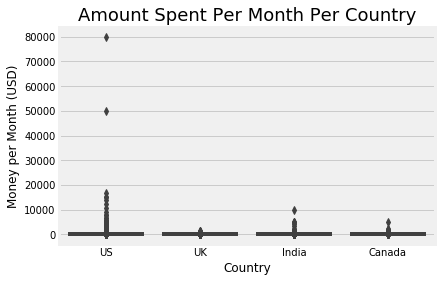

In [8]:
top = p_month_nn[p_month_nn['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'per_month', data = top)
plt.title('Amount Spent Per Month Per Country', fontsize=18)
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

From observation we see nothing wrong with the UK, India or Canada's Distributions but there are a couple of obvious outliers in the US. These may be correctly inputted information, but distorts our mean significantly and so we'll remove every value in USA that is over $20,000 spent per month to learn code and then recompute the mean and boxplots:

In [9]:
p_month_nn = p_month_nn[p_month_nn['per_month'] < 20000]
countries_mean = p_month_nn.groupby('CountryLive').mean()
countries_mean['per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: per_month, dtype: float64

([<matplotlib.axis.XTick at 0x1a1d0cff60>,
 <a list of 4 Text xticklabel objects>)

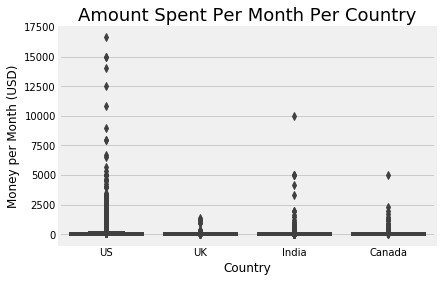

In [10]:
top = p_month_nn[p_month_nn['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y = 'per_month', data = top)
plt.title('Amount Spent Per Month Per Country', fontsize=18)
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

India seems to now have a couple of outliers, over the $2500 mark. We'll look at these rows to figure out if there's any reason for this such as attending an expensive bootcamp.

In [11]:
i_outliers = top[(top['per_month'] > 2500) & (top['CountryLive'] == 'India')]
i_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None attended any bootcamps and only 1 attended a Coding Event. If we look into the questions asked in the survey some questions may have been misinterpretted, such as including university tuition in their spending per month answer on learning to code. It seems safe to remove these outliers. We'll then look at US outliers:

In [12]:
top = top.drop(i_outliers.index)

us_outliers = top[(top['per_month'] > 6000) & (top['CountryLive'] == 'United States of America')]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


6 of these outliers attended bootcamps, justifying the large amounts of money they've spent per month. We'll remove the other 5 rows.  

In [13]:
us_outliers['MonthsProgramming']

718       1.0
1222      2.0
3184      1.0
3930      6.0
6805      1.0
7198      5.0
7505      3.0
9778      1.0
16650    12.0
16997     1.0
17231     2.0
Name: MonthsProgramming, dtype: float64

8 people in these outliers have been programming for 3 or less months. The reason that they've spent more per month would be due to either a bootcamp or other such as several conferences. If the price was spread out over several more months then these would no longer be outliers. Hence we'll take these rows out too:

In [14]:
# Removing us outliers who haven't attended a Bootcamp

to_drop = top[(top['CountryLive'] == 'United States of America') & (top['per_month'] > 6000) 
              & (top['AttendedBootcamp'] == 0)]
top = top.drop(to_drop.index)

# Removing us outliers who have spent 3 or less months coding

to_drop = top[(top['CountryLive'] == 'United States of America') & (top['per_month'] > 6000)
              & (top['MonthsProgramming'] <= 3)]
top = top.drop(to_drop.index)

There is an outlier in Canada; let's look more into this person:

In [15]:
ca_outliers = top[(top['CountryLive'] == 'Canada') & (top['per_month'] > 4500)]
ca_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This again is another case in someone paying for a bootcamp, but has less than 3 months experience in coding. We'll take the same approach as previously and remove this outlier. Then we'll recompute the mean values again and generate box plots.

In [16]:
top = top.drop(ca_outliers.index)

countries_mean = top.groupby('CountryLive').mean()
countries_mean['per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: per_month, dtype: float64

([<matplotlib.axis.XTick at 0x1a1d394048>,
 <a list of 4 Text xticklabel objects>)

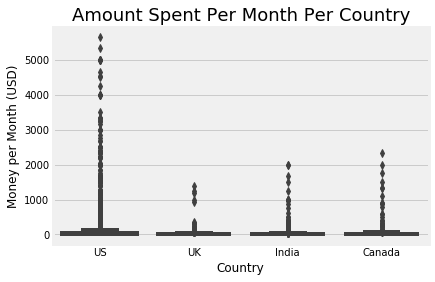

In [17]:
sns.boxplot(x = 'CountryLive', y = 'per_month', data = top)
plt.title('Amount Spent Per Month Per Country', fontsize=18)
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

# Choosing Two Best Markets
The best market to choose would obviously be USA, but what if we want to advertise in two markets?  
Looking at the absolute frequency of the people sampled in these 3 countries;
* UK has 315
* India has 528
* Canada has 260  
The data strongly suggests we shouldn't choose the UK as our second market of choice, and not choose India because the amount spent per month is second lowest, but let's assume our product is a subscription based e learning package that costs $60. This on is about the average amount someone in India spends. The frequency of people in the sample from India is over double that of Canada. 

In [19]:
top['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Percentage wise India and Canada are still quite low, so it's difficult to choose between the two. We have several routes we could pursue:
1. Split the advertisement budget between the US, India and Canada
  
  * e.g. 60% US, 25% India and 15% Canada  
  
  
2. Split the advertisement budget between only two countries, such as
  
  * 65% US and 35% India
  * 75% US and 25% Canada
  
    
3. Advertise only in the US  
  
At this point we should consider sending this analysis to the marketing team of the company, whom can best judge what to do using their knowledge.

# Conclusion
In this project we analysed survey data of new coders to find which two best markets to advertise in. The key conclusion we have made is that one of these markets should definitely be the US.  
  
The second best market is difficult to conclude as there isn't a crystal clear winner between India and Canada, hence it would be best to send these results to our marketing team in the company who can use their domain knowledge to take the best decision.